                                                            Import

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np

                                                            DATA VISUALISATION

In [7]:
IMAGE_SIZE=256
BATCH_SIZE=32

In [8]:
df = keras.utils.image_dataset_from_directory(
   'apple' , image_size=(256,256), batch_size = 32, shuffle= True
)

Found 4645 files belonging to 4 classes.


In [9]:
dir(df)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_batch_size',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_drop_remainder',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '

In [10]:
classes= df.class_names
classes

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy']

In [11]:
len(df)

146

In [12]:
df.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [13]:
for image, label in df.take(1):
    print(image.shape)
    print(label.numpy())
    print(len(label))

(32, 256, 256, 3)
[0 1 1 1 1 2 1 0 2 3 3 0 2 3 2 3 3 2 3 3 0 3 3 0 2 1 3 0 3 3 3 0]
32


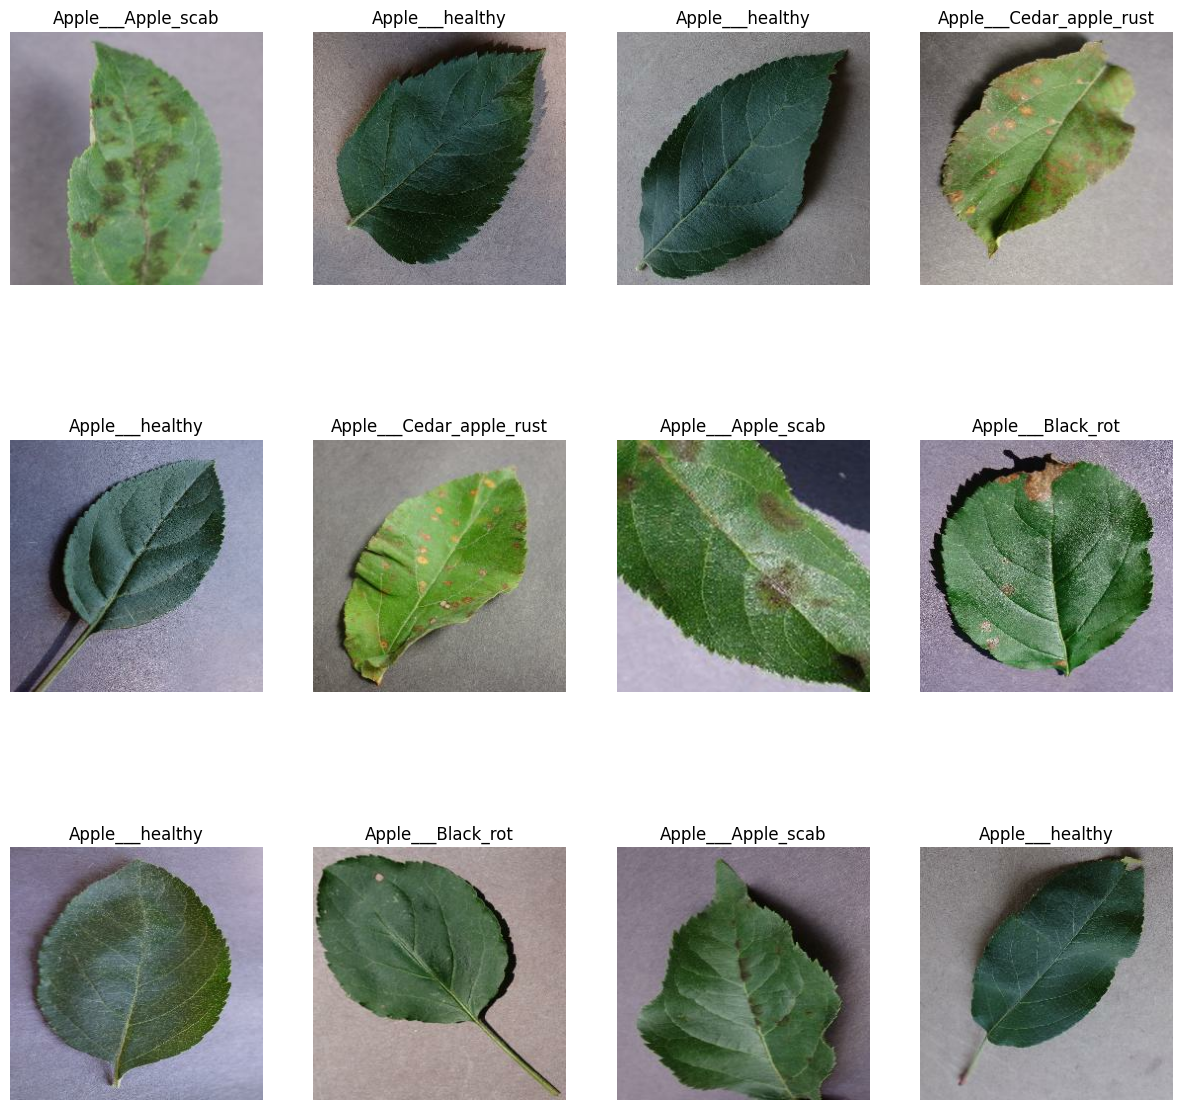

In [14]:
plt.figure(figsize=(15, 15))
for im,l in df.take(1):
    for i in range(12):
        ax = plt.subplot(3, 4, i + 1)
        plt.imshow(im[i].numpy().astype('uint8'))
        plt.title(classes[l[i]])
        plt.axis('off')

                                                                        Spliting 

In [15]:
#3 values = train , validate, test

In [34]:
num_df= len(df)
num_df

146

In [35]:
train_size= 0.8

In [36]:
train_data= num_df*train_size

In [37]:
train_data

116.80000000000001

In [38]:
train_ds= df.take(116)

In [39]:
len(train_ds)

116

In [40]:
dir(train_ds)

['_GeneratorState',
 '__abstractmethods__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__debug_string__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__nonzero__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__slots__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_apply_debug_options',
 '_as_serialized_graph',
 '_checkpoint_dependencies',
 '_common_args',
 '_consumers',
 '_convert_variables_to_tensors',
 '_count',
 '_deferred_dependencies',
 '_deserialization_dependencies',
 '_deserialize_from_proto',
 '_export_to_saved_model_graph',
 '_flat_shapes',
 '_flat_structure',
 '_flat_types',
 '_functions',
 '_gather_sa

In [41]:
type(train_ds)

tensorflow.python.data.ops.take_op._TakeDataset

In [43]:
test_ds = df.skip(116)
len(test_ds)

30

In [44]:
len(test_ds)

30

In [45]:
len(test_ds)+len(train_ds)== len(df)

True

In [46]:
val_size = 0.1
len(df)*val_size

14.600000000000001

In [47]:
val_ds= test_df.skip(15)

In [48]:
len(val_ds)

15

In [49]:
len(test_ds)

30

In [50]:
test_ds= test_df.skip(15)

In [51]:
len(test_ds)

15

In [52]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert (train_split + test_split + val_split) == 1
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [53]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(df)

In [55]:
len(train_ds)

116

In [58]:
type(train_ds)

tensorflow.python.data.ops.take_op._TakeDataset

                                                                    Resizing

In [60]:

resize_and_rescale = keras.Sequential([
  layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
  layers.experimental.preprocessing.Rescaling(1./255),
])

                                                    Data Augmentation (For better accuracy)

In [61]:

data_augmentation = keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

In [62]:
train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y)
).prefetch(buffer_size=tf.data.AUTOTUNE)

                                                                                CNN

In [68]:
input_shape = (32,256, 256, 3)
n_classes = 4

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

In [69]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d_6 (Conv2D)           (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (32, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (32, 62, 62, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (32, 60, 60, 64)         

In [70]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [72]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50
)

Epoch 1/50
116/116 [==============================] - 164s 1s/step - loss: 0.9850 - accuracy: 0.5688 - val_loss: 0.9363 - val_accuracy: 0.6406
Epoch 2/50
116/116 [==============================] - 163s 1s/step - loss: 0.7104 - accuracy: 0.7056 - val_loss: 0.8144 - val_accuracy: 0.7455
Epoch 3/50
116/116 [==============================] - 174s 1s/step - loss: 0.5757 - accuracy: 0.7729 - val_loss: 0.7749 - val_accuracy: 0.7701
Epoch 4/50
116/116 [==============================] - 189s 2s/step - loss: 0.5440 - accuracy: 0.7916 - val_loss: 0.8539 - val_accuracy: 0.7589
Epoch 5/50
116/116 [==============================] - 168s 1s/step - loss: 0.4398 - accuracy: 0.8320 - val_loss: 1.6380 - val_accuracy: 0.6518
Epoch 6/50
116/116 [==============================] - 156s 1s/step - loss: 0.4060 - accuracy: 0.8540 - val_loss: 0.4415 - val_accuracy: 0.8670
Epoch 7/50
116/116 [==============================] - 160s 1s/step - loss: 0.4008 - accuracy: 0.8559 - val_loss: 0.9037 - val_accuracy: 0.7388

In [73]:
scores = model.evaluate(test_ds)

16/16 [==============================] - 6s 260ms/step - loss: 0.1725 - accuracy: 0.9551


In [81]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 28ms/step


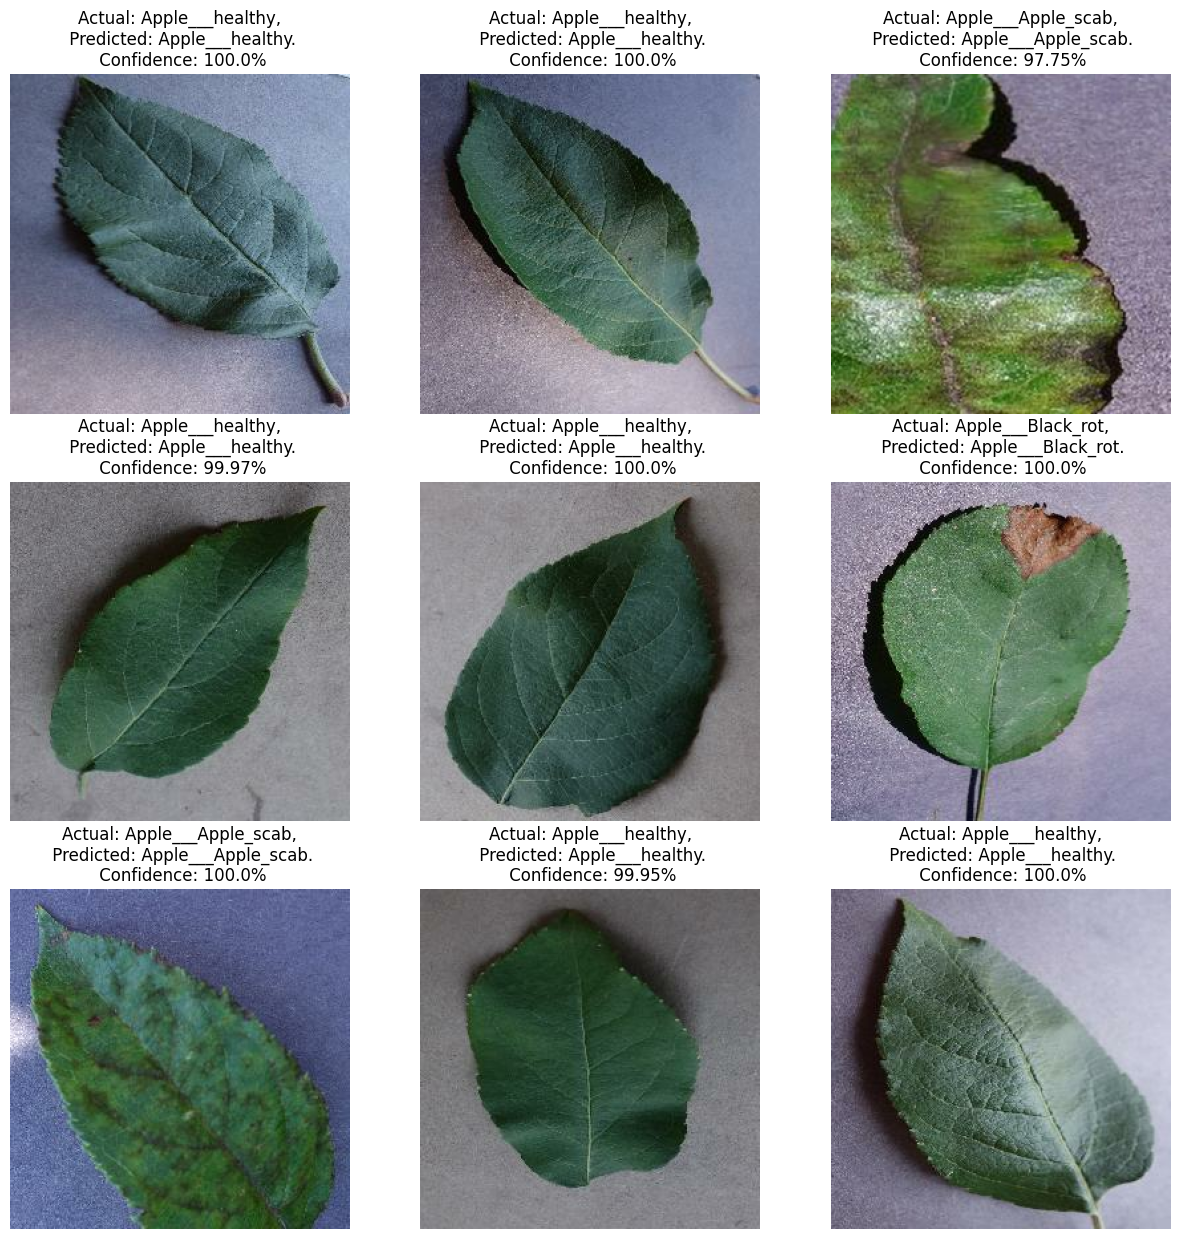

In [82]:
class_names = df.class_names
class_names

plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

In [108]:
from sklearn.externals import joblib

ModuleNotFoundError: No module named 'sklearn'

In [109]:
import sklearn

ModuleNotFoundError: No module named 'sklearn'

In [106]:
joblib.save("./APPLES.hdf5")

NameError: name 'joblib' is not defined

In [104]:
%%writefile app.py
import streamlit as st
import tensorflow as tf



@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('./APPLES.h5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Flower Classification
         """
         )

file = st.file_uploader("Please upload an brain scan file", type=["jpg", "png", "jpeg"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)
def import_and_predict(image_data, model):
    
        size = (256,256)    
        image = ImageOps.fit(image_data, size, Image.ANTIALIAS)
        image = np.asarray(image)
        img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        #img_resize = (cv2.resize(img, dsize=(75, 75),    interpolation=cv2.INTER_CUBIC))/255.
        
        img_reshape = img[np.newaxis,...]
    
        prediction = model.predict(img_reshape)
        
        return prediction
if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    predictions = import_and_predict(image, model)
    score = tf.nn.softmax(predictions[0])
    st.write(prediction)
    st.write(score)
    print(
    "This image most likely belongs to {} with a {:.2f} percent confidence."
    .format(class_names[np.argmax(score)], 100 * np.max(score))
)

Writing app.py


In [105]:
!streamlit run app.py & npx localtunnel --port 8501

^C


In [110]:
import sys
sys.executable

'C:\\Users\\dheer\\AppData\\Local\\Programs\\Python\\Python311\\python.exe'

In [113]:
import streamlit

ModuleNotFoundError: No module named 'streamlit'